# Strats fo squid ink


## finding global patterns ?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d0,d1,d2=pd.read_csv('r1-data/prices_round_1_day_-2.csv',sep=';'),pd.read_csv('r1-data/prices_round_1_day_-1.csv',sep=';'),pd.read_csv('r1-data/prices_round_1_day_0.csv',sep=';')

In [3]:

combined = pd.concat([d0, d1, d2],ignore_index=True)

combined.loc[combined['day'] == -1, 'timestamp'] += 1000000
combined.loc[combined['day'] == 0, 'timestamp'] += 2000000

combined = combined.sort_values('timestamp').reset_index(drop=True)

kelp=combined[combined['product']=='KELP']
combined=combined[combined['product']=='SQUID_INK']



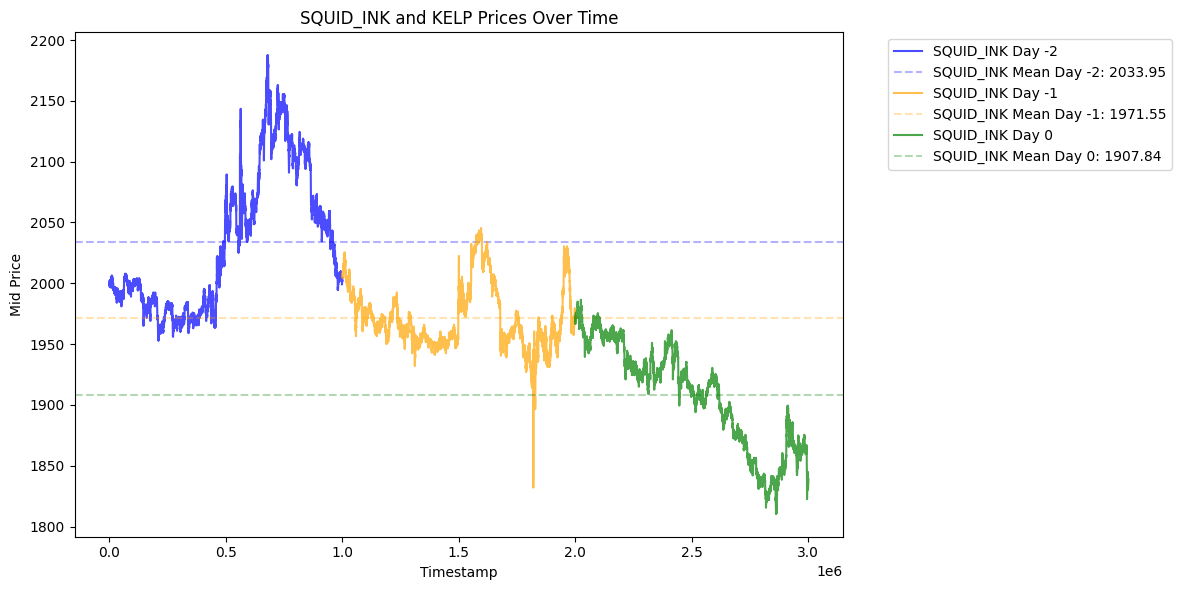

In [4]:
# Create a scatter plot with different colors for each day
colors = {-2:'blue', -1:'orange', 0:'green'}

plt.figure(figsize=(12, 6))

# Plot SQUID_INK
for day in [-2, -1, 0]:
    squid_mask = combined['day'] == day
    squid_mean = combined[squid_mask]['mid_price'].mean()
    plt.plot(combined[squid_mask]['timestamp'], combined[squid_mask]['mid_price'], 
             label=f'SQUID_INK Day {day}', color=colors[day], alpha=0.7)
    plt.axhline(y=squid_mean, color=colors[day], linestyle='--', alpha=0.3,
                label=f'SQUID_INK Mean Day {day}: {squid_mean:.2f}')

# Plot KELP with dashed lines
# for day in [-2, -1, 0]:
#     kelp_mask = kelp['day'] == day
#     kelp_mean = kelp[kelp_mask]['mid_price'].mean()
#     plt.plot(kelp[kelp_mask]['timestamp'], kelp[kelp_mask]['mid_price'], 
#              label=f'KELP Day {day}', color=colors[day], linestyle=':', alpha=0.7)
#     plt.axhline(y=kelp_mean, color=colors[day], linestyle=':', alpha=0.3,
#                 label=f'KELP Mean Day {day}: {kelp_mean:.2f}')

plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.title('SQUID_INK and KELP Prices Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()




In [5]:
def plot_graph(input_df):
    df=input_df[input_df['product']=='SQUID_INK'][1000:]
    squid_mean = df['mid_price'].mean()
    plt.plot(df['timestamp'], df['mid_price'], 
             label='SQUID_INK Day', color=colors[day], alpha=0.7)
    plt.axhline(y=squid_mean, linestyle='--', alpha=0.3,
                label=f'SQUID_INK Mean Day: {squid_mean:.2f}')

    plt.plot()
    plt.show()

In [6]:
combined.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
2,-2,0,SQUID_INK,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0
3,-2,100,SQUID_INK,1999,5,1998.0,26.0,NaN,NaN,2001,20,NaN,NaN,NaN,NaN,2000.0,0.0
7,-2,200,SQUID_INK,1997,31,NaN,NaN,NaN,NaN,2000,1,2001.0,30.0,NaN,NaN,1998.5,0.0
9,-2,300,SQUID_INK,1997,27,NaN,NaN,NaN,NaN,2000,27,NaN,NaN,NaN,NaN,1998.5,0.0
14,-2,400,SQUID_INK,1996,20,NaN,NaN,NaN,NaN,2000,20,NaN,NaN,NaN,NaN,1998.0,0.0


In [7]:
web=pd.read_csv('r1-data/d1.csv',sep=';')

web




,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,SQUID_INK,1834,23,NaN,NaN,NaN,NaN,1838,23,NaN,NaN,NaN,NaN,1836.0,0.0
1,1,0,RAINFOREST_RESIN,9998,9,9995.0,23.0,NaN,NaN,10005,23,NaN,NaN,NaN,NaN,10001.5,0.0
2,1,0,KELP,2032,23,NaN,NaN,NaN,NaN,2035,23,NaN,NaN,NaN,NaN,2033.5,0.0
3,1,100,KELP,2034,1,2033.0,2.0,2032.0,22.0,2035,22,NaN,NaN,NaN,NaN,2034.5,0.0
4,1,100,SQUID_INK,1837,1,1836.0,2.0,1835.0,22.0,1839,22,NaN,NaN,NaN,NaN,1838.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,99800,SQUID_INK,1814,26,NaN,NaN,NaN,NaN,1817,26,NaN,NaN,NaN,NaN,1815.5,0.0
2996,1,99800,RAINFOREST_RESIN,9996,1,9995.0,25.0,NaN,NaN,10002,5,10004.0,1.0,10005.0,25.0,9999.0,1667.0
2997,1,99900,SQUID_INK,1816,27,NaN,NaN,NaN,NaN,1819,28,NaN,NaN,NaN,NaN,1817.5,0.0
2998,1,99900,RAINFOREST_RESIN,9998,6,9996.0,1.0,9995.0,27.0,10004,1,10005.0,27.0,NaN,NaN,10001.0,1667.0


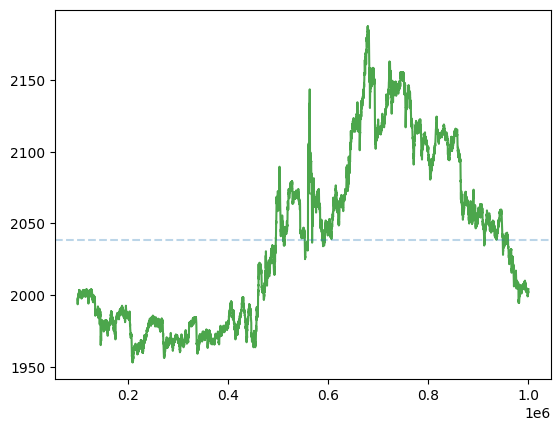

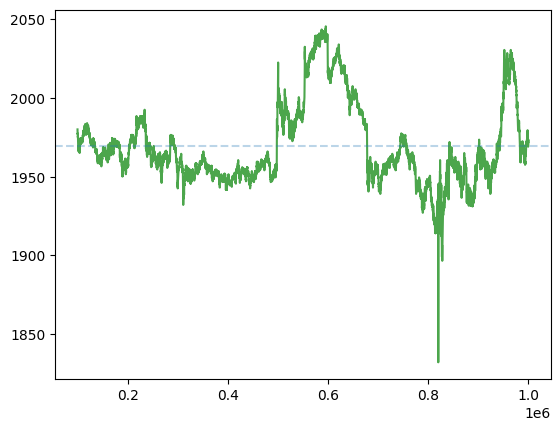

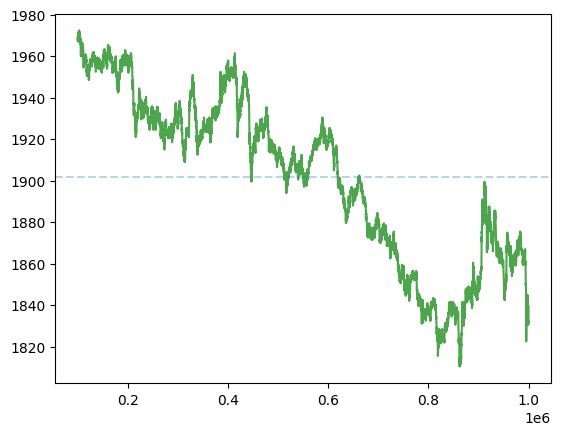

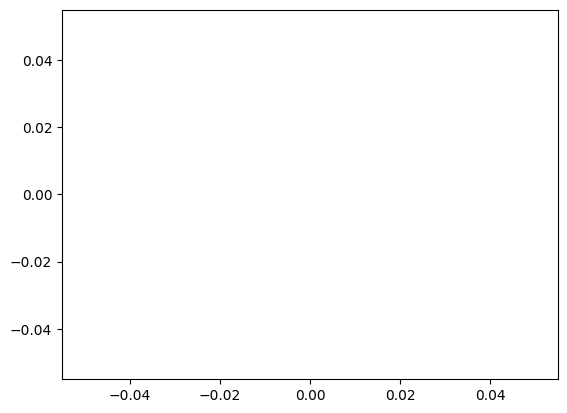

In [8]:
for x in [d0,d1,d2,web]:
    plot_graph(x)

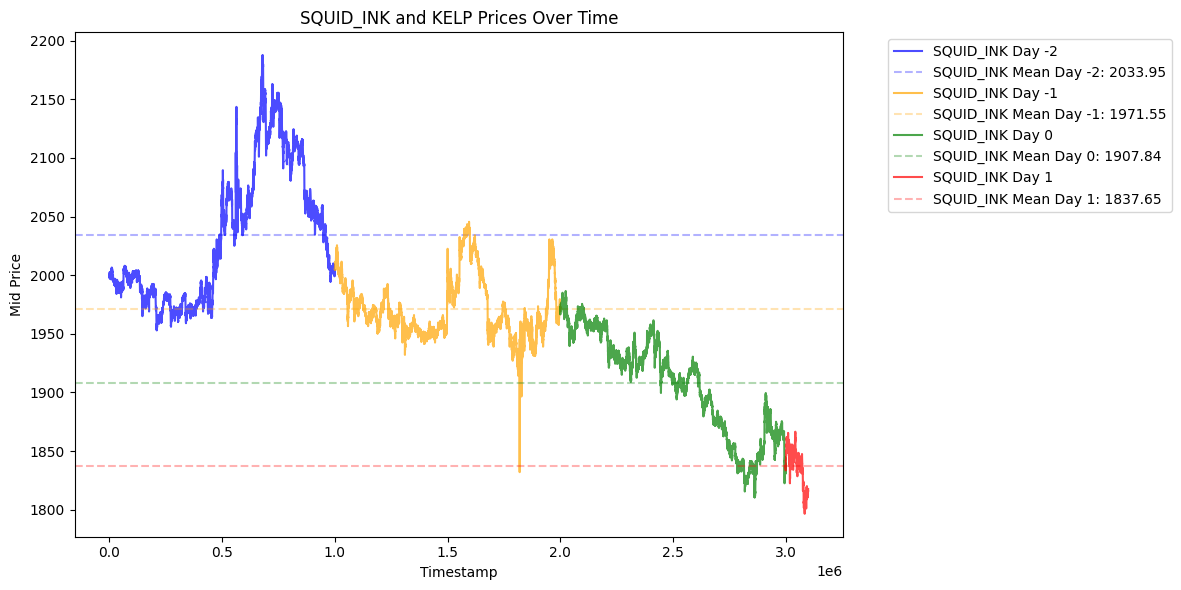

In [9]:

combined = pd.concat([d0, d1, d2,web],ignore_index=True)

combined.loc[combined['day'] == -1, 'timestamp'] += 1000000
combined.loc[combined['day'] == 0, 'timestamp'] += 2000000
combined.loc[combined['day'] == 1, 'timestamp'] += 3000000

combined = combined.sort_values('timestamp').reset_index(drop=True)

# kelp=combined[combined['product']=='KELP']
combined=combined[combined['product']=='SQUID_INK']

# Create a scatter plot with different colors for each day
colors = {-2:'blue', -1:'orange', 0:'green',1:'red'}

plt.figure(figsize=(12, 6))

# Plot SQUID_INK
for day in [-2, -1, 0,1]:
    squid_mask = combined['day'] == day
    squid_mean = combined[squid_mask]['mid_price'].mean()
    plt.plot(combined[squid_mask]['timestamp'], combined[squid_mask]['mid_price'], 
             label=f'SQUID_INK Day {day}', color=colors[day], alpha=0.7)
    plt.axhline(y=squid_mean, color=colors[day], linestyle='--', alpha=0.3,
                label=f'SQUID_INK Mean Day {day}: {squid_mean:.2f}')

# Plot KELP with dashed lines
# for day in [-2, -1, 0]:
#     kelp_mask = kelp['day'] == day
#     kelp_mean = kelp[kelp_mask]['mid_price'].mean()
#     plt.plot(kelp[kelp_mask]['timestamp'], kelp[kelp_mask]['mid_price'], 
#              label=f'KELP Day {day}', color=colors[day], linestyle=':', alpha=0.7)
#     plt.axhline(y=kelp_mean, color=colors[day], linestyle=':', alpha=0.3,
#                 label=f'KELP Mean Day {day}: {kelp_mean:.2f}')

plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.title('SQUID_INK and KELP Prices Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

combined.to_csv('combined_data.csv', sep=';', index=False)

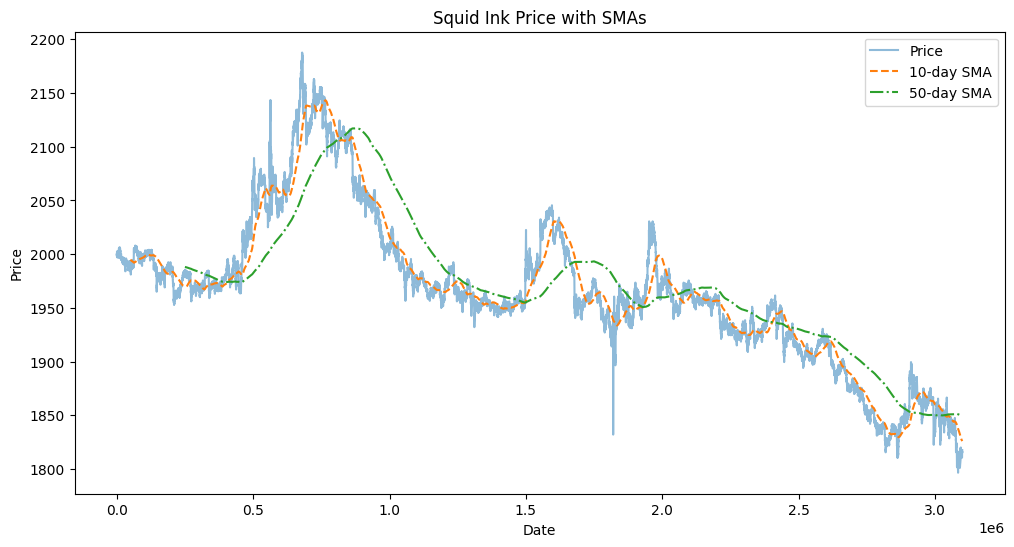

In [ ]:
df=combined
# Calculate a short (e.g., 10-day) and long (e.g., 50-day) simple moving average
df['SMA_10'] = df['mid_price'].rolling(window=500).mean()
df['SMA_50'] = df['mid_price'].rolling(window=2500).mean()

# Plot the price along with the moving averages
plt.figure(figsize=(12,6))
plt.plot(df['timestamp'], df['mid_price'], label='Price', alpha=0.5)
plt.plot(df['timestamp'], df['SMA_10'], label='10-day SMA', linestyle='--')
plt.plot(df['timestamp'], df['SMA_50'], label='50-day SMA', linestyle='-.')
plt.title("Squid Ink Price with SMAs")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


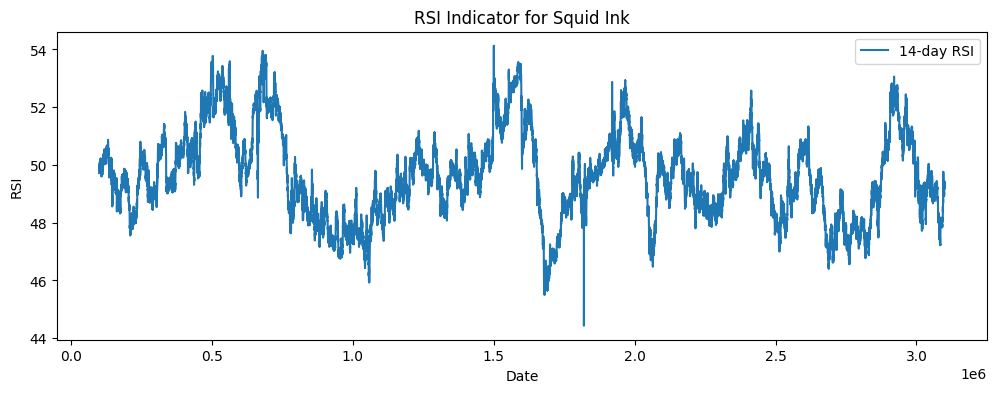

In [11]:
def compute_RSI(series, period=1000):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=period, min_periods=period).mean()
    avg_loss = loss.rolling(window=period, min_periods=period).mean()
    RS = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + RS))
    return rsi

df['RSI_14'] = compute_RSI(df['mid_price'])
plt.figure(figsize=(12,4))
plt.plot(df['timestamp'], df['RSI_14'], label='14-day RSI')
plt.title("RSI Indicator for Squid Ink")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.show()

/var/folders/07/c9zwywgx7s7dmr07xpxgf21r0000gn/T/ipykernel_78111/1006997048.py:15: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df['Position'] = df['Signal'].replace(to_replace=0, method='ffill')


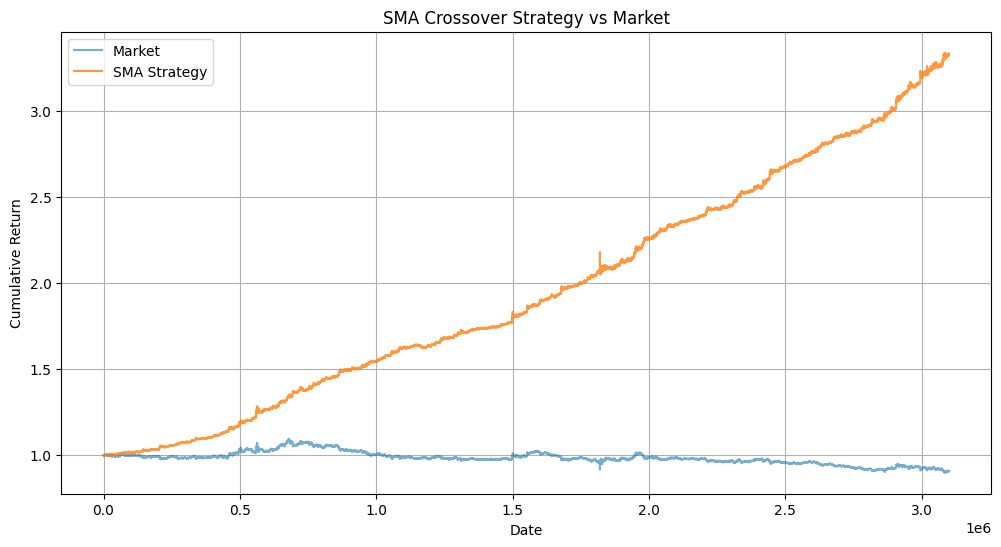

In [12]:
# Calculate SMAs
df['SMA10'] = df['mid_price'].ewm(span=5, adjust=False).mean()
df['SMA50'] = df['mid_price'].ewm(span=100, adjust=False).mean()

# Initialize Signal column
df['Signal'] = 0

# Buy signal: 10-day SMA crosses above 50-day SMA
df.loc[(df['SMA10'] > df['SMA50']) & (df['SMA10'].shift() <= df['SMA50'].shift()), 'Signal'] = 1

# Sell signal: 10-day SMA crosses below 50-day SMA
df.loc[(df['SMA10'] < df['SMA50']) & (df['SMA10'].shift() >= df['SMA50'].shift()), 'Signal'] = -1

# Position: forward fill signal to maintain position until next signal
df['Position'] = df['Signal'].replace(to_replace=0, method='ffill')

# Compute daily returns
df['Returns'] = df['mid_price'].pct_change()

# Strategy returns = market returns × position
df['Strategy_Returns'] = df['Returns'] * df['Position']

# Cumulative returns
df['Cumulative_Market'] = (1 + df['Returns']).cumprod()
df['Cumulative_Strategy'] = (1 + df['Strategy_Returns']).cumprod()



plt.figure(figsize=(12,6))
plt.plot(df['timestamp'], df['Cumulative_Market'], label='Market', alpha=0.6)
plt.plot(df['timestamp'], df['Cumulative_Strategy'], label='SMA Strategy', alpha=0.8)
plt.title("SMA Crossover Strategy vs Market")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,SMA_50,RSI_14,SMA10,SMA50,Signal,Position,Returns,Strategy_Returns,Cumulative_Market,Cumulative_Strategy
2,-2,0,SQUID_INK,1998,26,NaN,NaN,NaN,NaN,2002,...,NaN,NaN,2000.000000,2000.000000,0,0,NaN,NaN,NaN,NaN
3,-2,100,SQUID_INK,1999,5,1998.0,26.0,NaN,NaN,2001,...,NaN,NaN,2000.000000,2000.000000,0,0,0.000000,0.000000,1.00000,1.000000
7,-2,200,SQUID_INK,1997,31,NaN,NaN,NaN,NaN,2000,...,NaN,NaN,1999.500000,1999.970297,-1,-1,-0.000750,0.000750,0.99925,1.000750
9,-2,300,SQUID_INK,1997,27,NaN,NaN,NaN,NaN,2000,...,NaN,NaN,1999.166667,1999.941182,0,-1,0.000000,-0.000000,0.99925,1.000750
14,-2,400,SQUID_INK,1996,20,NaN,NaN,NaN,NaN,2000,...,NaN,NaN,1998.777778,1999.902743,0,-1,-0.000250,0.000250,0.99900,1.001000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92986,1,3099500,SQUID_INK,1814,20,NaN,NaN,NaN,NaN,1818,...,1858.1069,49.434513,1814.590829,1813.610189,0,1,0.000827,0.000827,0.90800,3.329873
92990,1,3099600,SQUID_INK,1815,28,NaN,NaN,NaN,NaN,1818,...,1858.0869,49.397590,1815.227220,1813.667413,0,1,0.000275,0.000275,0.90825,3.330790
92991,1,3099700,SQUID_INK,1813,26,NaN,NaN,NaN,NaN,1817,...,1858.0661,49.288061,1815.151480,1813.693801,0,1,-0.000826,-0.000826,0.90750,3.328039
92994,1,3099800,SQUID_INK,1814,26,NaN,NaN,NaN,NaN,1817,...,1858.0454,49.176729,1815.267653,1813.729567,0,1,0.000275,0.000275,0.90775,3.328956
